In [51]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.integrate import quad

#parámetros de nuestro problema
L=1 #longitud del hilo
N=200 #numero de intervalos
delta=L/N #paso de cada intervalo
epsilon=8.8541878E-12 #cte dieléctrica vacío
cte=4*np.pi*epsilon
radio=L/1000 #grosor del hilo (y)

#variables
xi=np.linspace(0.5*delta,(N-0.5)*delta,N) 
x= np.linspace(0,L,N*10)
g=np.zeros(N)
ll=np.zeros((N,N))

#funciones
def f(i,x): #funcion base. Pulsos
    if abs(x-xi[i])<delta/2 or abs(x-xi[i])-delta/2<10E-15:
        return 1
    else:
        return 0
    
def Lopera(j,i): #integral de lij
    I,I2=quad(lambda x: 1/(np.sqrt((x-xi[j-1])**2+radio**2)),(i-1)*delta,i*delta)
    return I

def densidad(x): #densidad de carga en el hilo
    d=0
    for i in range(N):
        d+=alfa[i]*f(i,x)
    return d

def potencial(x): #potencial en x debido a las fuentes en xprima
    pot=0
    for i in range(1,N+1):
        I,Ierr=quad(lambda xp: 1/np.sqrt((x-xp)**2+radio**2),(i-1)*delta,i*delta)
        pot+=I*alfa[i-1]
    return pot/cte

#calculamos los coeficientes alfa   
for j in range(N):
    g[j]=cte 
    for i in range(N):
        ll[j,i]=Lopera(j+1,i+1)
        
alfa=np.linalg.solve(ll,g)

#una vez que conocemos los alfa, podemos calcular la densidad de cargas y el potencial

dens= np.zeros(len(xi))
V = np.zeros(len(x))

for i in range(len(x)):#calculamos pontencial
    V[i] = potencial(x[i])
for i in range(len(xi)):#calculamos densidad
    dens[i] = densidad(xi[i])        



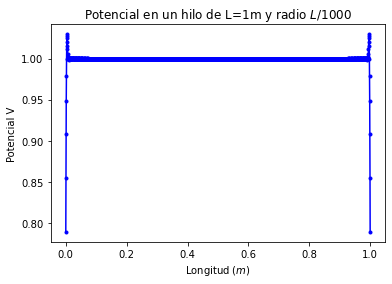

In [60]:
#ploteamos el potencial
plt.plot(x,V,'.-b')
plt.xlabel("Longitud $(m)$")
plt.ylabel("Potencial V")
plt.title("Potencial en un hilo de L=1m y radio $L/1000$")
plt.show()

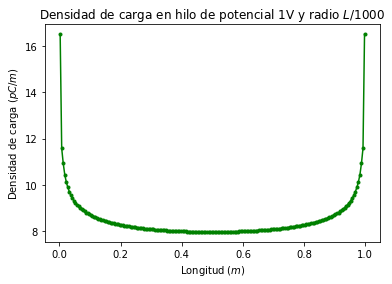

In [59]:
#ploteamos la densidad de carga
plt.plot(xi,dens*1e12,'.-g')
plt.xlabel("Longitud $(m)$")
plt.ylabel("Densidad de carga $(pC/m)$")
plt.title("Densidad de carga en hilo de potencial 1V y radio $L/1000$")
plt.show()